# 电液伺服阀测试
1. 初始化环境+载入模型

In [1]:
from OMPython import OMCSessionZMQ
from OMPython import ModelicaSystem
import matplotlib.pyplot as plt
import numpy as np
work_path = OMCSessionZMQ().sendExpression("cd()")
mod = ModelicaSystem(work_path+"/HSV_test.mo","HSV_test",[work_path+"/../CL4CSM/package.mo","Modelica"])

2021-06-08 19:51:45,728 - OMPython - INFO - OMC Server is up and running at file:///C:/Users/shubo/AppData/Local/Temp/openmodelica.port.50b78bc0feef43f4adde7e829eb154e4 pid=12332
2021-06-08 19:51:46,256 - OMPython - INFO - OMC Server is up and running at file:///C:/Users/shubo/AppData/Local/Temp/openmodelica.port.cbfcc6841b154f259fe22459a48ce749 pid=1892


2.定义模型参数（供油压力MPa、回油压力MPa、额定电流mA、额定流量L/min）

In [2]:
P_P, P_T, I_R, Q_R = 2e6, 0, 0.31, 2
mod.setParameters( ["constP_Boundary2.P="+str(P_P), "constP_Boundary.P="+str(P_T)] )
mod.setParameters( ["hsv.I_R="+str(I_R/2), "hsv.P_R="+str((P_P+P_T)/2), "hsv.W_R="+str(Q_R/60*0.78)] )
mod.setSimulationOptions(["stopTime=1"])
print(mod.getParameters( ["hsv.I_R", "hsv.P_R", "hsv.W_R"] ))
print(mod.getSimulationOptions())
# mod.getParameters()

['0.155', '1000000.0', '0.026']
{'startTime': '0', 'stopTime': '1', 'stepSize': '0.002', 'tolerance': '1e-006', 'solver': 'dassl'}


3.载入试验数据，绘制流量特性图

Total number of points = 100


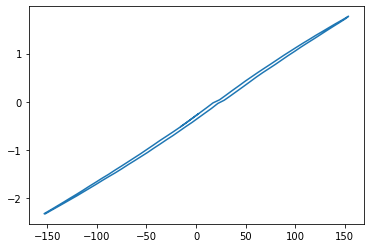

In [3]:
data_origin = np.genfromtxt('data.csv', delimiter=',', skip_header = 1)
data = data_origin[::500,:]
pt_num = np.size(data,0)
print( "Total number of points = " + str(pt_num))
plt.plot(data[:,0], data[:,1])

4.运行模型并将结果

In [5]:
rcd = np.zeros((pt_num, 1))

for i in range( pt_num ) :
    
    mod.setParameters( ["I_in="+str(data[i,0]/1000)] )
    mod.simulate()
    res = mod.getSolutions(["hsv.P.m_dot"])
    rcd[i,0] = res[0,-1]

5.绘图

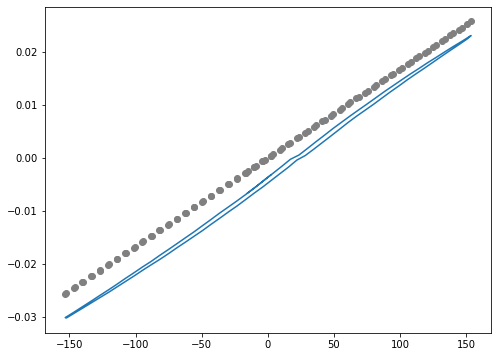

In [15]:
plt.figure(figsize=(8,6))
for i in range( pt_num ) :
    plt.scatter(data[i,0],rcd[i,0] if data[i,0]>0 else -rcd[i,0],color="grey",label="Sample Point",linewidth=1)
plt.plot(data[:,0], data[:,1]/60*0.78)
plt.show()